In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r"C:\\Users\\ASUS\\Desktop\\datasets\\Flight_train_set.xlsx")
df_test = pd.read_excel("C:\\Users\\ASUS\\Desktop\datasets\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx")

In [4]:
df.shape

(10683, 11)

Training dataset has 106831 Rows and 11 columns

In [5]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.nunique().sort_values()

Source                5
Total_Stops           5
Destination           6
Additional_Info      10
Airline              12
Date_of_Journey      44
Route               128
Dep_Time            222
Duration            368
Arrival_Time       1343
Price              1870
dtype: int64

In [10]:
df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

This data is belong to the same year or we can say that data is collected in year 2019

In [11]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

As we know the fare of indigo, jet Airways, Spicejet is comparitively cheap as compared to Air Asia, Vistara and other

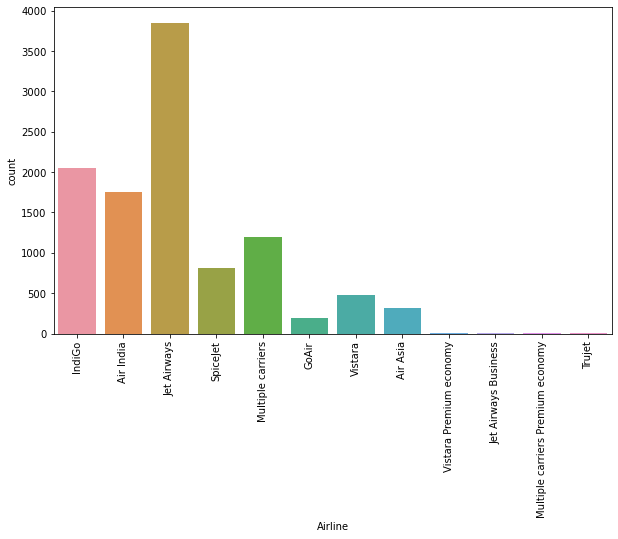

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df["Airline"],data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Source', ylabel='count'>

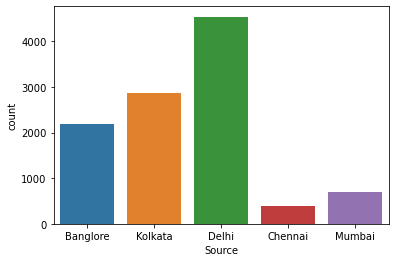

In [13]:
sns.countplot(df["Source"],data=df)

<AxesSubplot:xlabel='Destination', ylabel='count'>

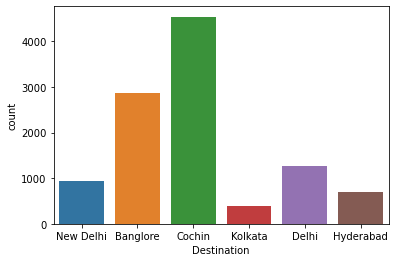

In [14]:
sns.countplot(df["Destination"],data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

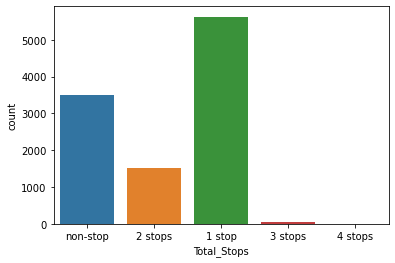

In [15]:
sns.countplot(df["Total_Stops"],data=df)

In [16]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Price', ylabel='Density'>

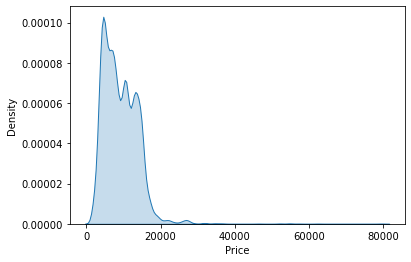

In [17]:
sns.kdeplot(df["Price"],data=df,fill=True)

Price is seemed to right skewed

### Bivariate Analysis

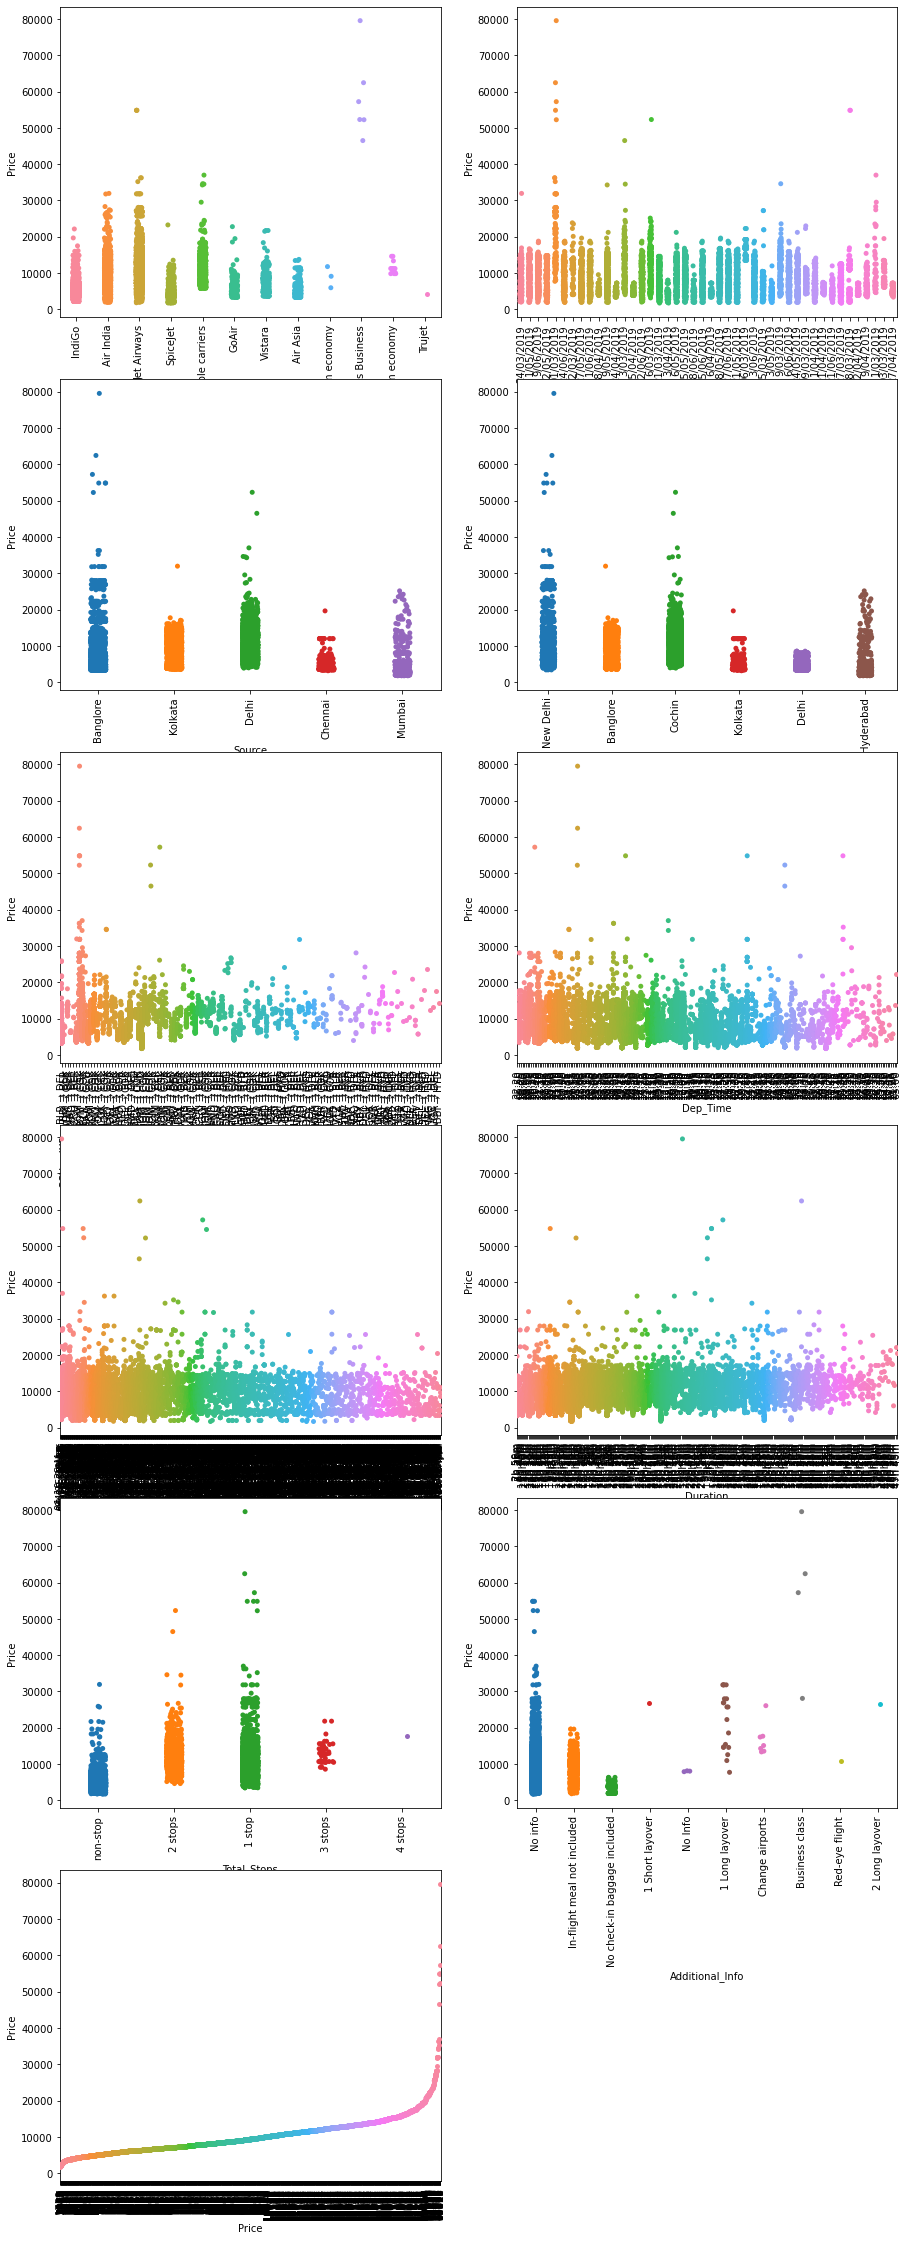

In [16]:
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.stripplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

* Airline :-Trujet, indigo, spicejet, GoAir, vistara, Air Asia and Vistara Premium economy price is comparitively low than Jet Airways Business

* Price is all time high on 1st march 2019 may be some holidays or because it's friday and there are some people who have two day weekend or if we see that graph we notice usually price a little high than the other day on weekend

* Ticket fare is high at Bangalore Airport and Delhi also have some Outliersa may be because of last minute booking

* The flight having 1 stop has high fare as compare to other

* People travelling in Business class has to pay high fare because of facility they are getting


<AxesSubplot:xlabel='Source', ylabel='Destination'>

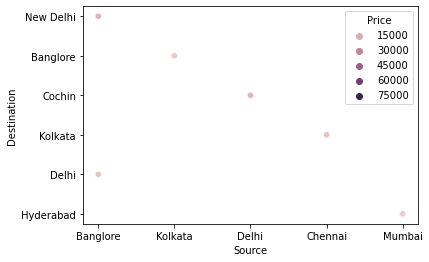

In [18]:
sns.scatterplot(df["Source"],df["Destination"],hue=df['Price'])

Above graph shows the fare between Source and Destination.

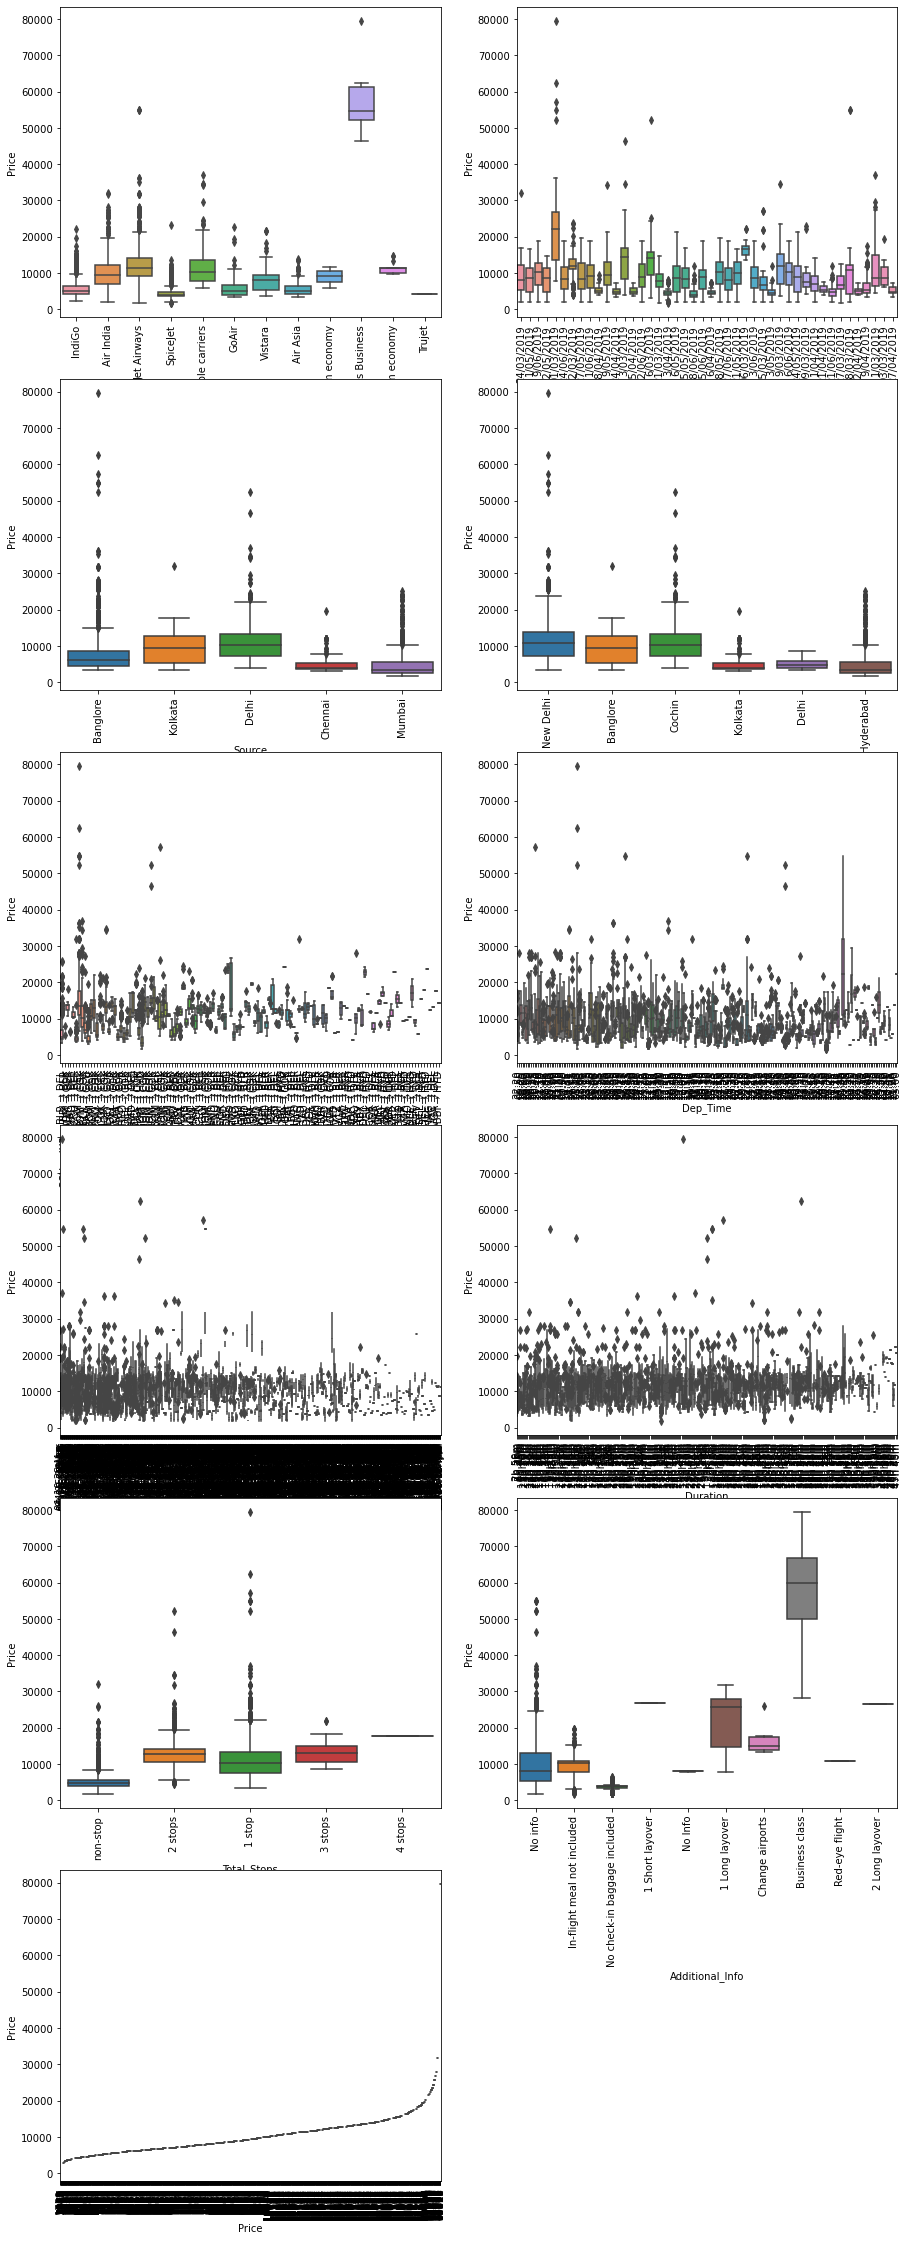

In [28]:
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

It shows that there is Outliers in Every column

### Before further Analysis need to Encode the data by using Encoder and Feature engineering

#### Feature engineering

In [19]:
df.dropna(inplace=True)

In [20]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Day"] =df["Date_of_Journey"].dt.day
df["Month"] =df["Date_of_Journey"].dt.month

In [21]:
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])

df["hour_of_dep"] = df["Dep_Time"].dt.hour

df["min_of_dep"] = df["Dep_Time"].dt.minute

In [22]:
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])
df['Arrival_hour'] = df["Arrival_Time"].dt.hour
df['Arrival_min'] = df["Arrival_Time"].dt.minute

In [23]:
df.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [24]:
# separating the hours and minute from Duration and making two new features
duration = list(df["Duration"])

for i in range(0,len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() +" 0m"
        else:
            duration[i] = "0h " +duration[i]

duration_hours = []
duration_min = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

    
    
df["duration_hours"] = duration_hours
df["duration_min"] = duration_min

In [27]:
# Splitting the route and making separate features and where info is missing Nan is filled by itself
df["Route1"] = df["Route"].str.split("→").str[0]
df["Route2"] = df["Route"].str.split("→").str[1]
df["Route3"] = df["Route"].str.split("→").str[2]
df["Route4"] = df["Route"].str.split("→").str[3]

In [28]:
df.drop(["Route","Duration"],axis=1,inplace=True)

In [29]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [30]:
# Label Encoding the data
df["Total_Stops"] = df["Total_Stops"].replace("non-stop",0)
df["Total_Stops"] = df["Total_Stops"].replace("2 stops",2)
df["Total_Stops"] = df["Total_Stops"].replace("1 stop",1)
df["Total_Stops"] = df["Total_Stops"].replace("3 stops",3)
df["Total_Stops"] = df["Total_Stops"].replace("4 stops",4)
df["Total_Stops"] = df["Total_Stops"].replace("2 stops",2)

In [31]:
obj = df.select_dtypes(exclude=np.number).columns

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
# Need to take care Nan because we need it in our dataset because where flight is direct or having 1 stop having Nan in remaining Route column
df["Route3"] = df["Route3"].astype("str")
df['Route4'] = df["Route4"].astype("str")

In [36]:
ord_enc = OrdinalEncoder()
for i in df[obj]:
    df[[i]] = ord_enc.fit_transform(df[[i]])

## Multivariate Analysis

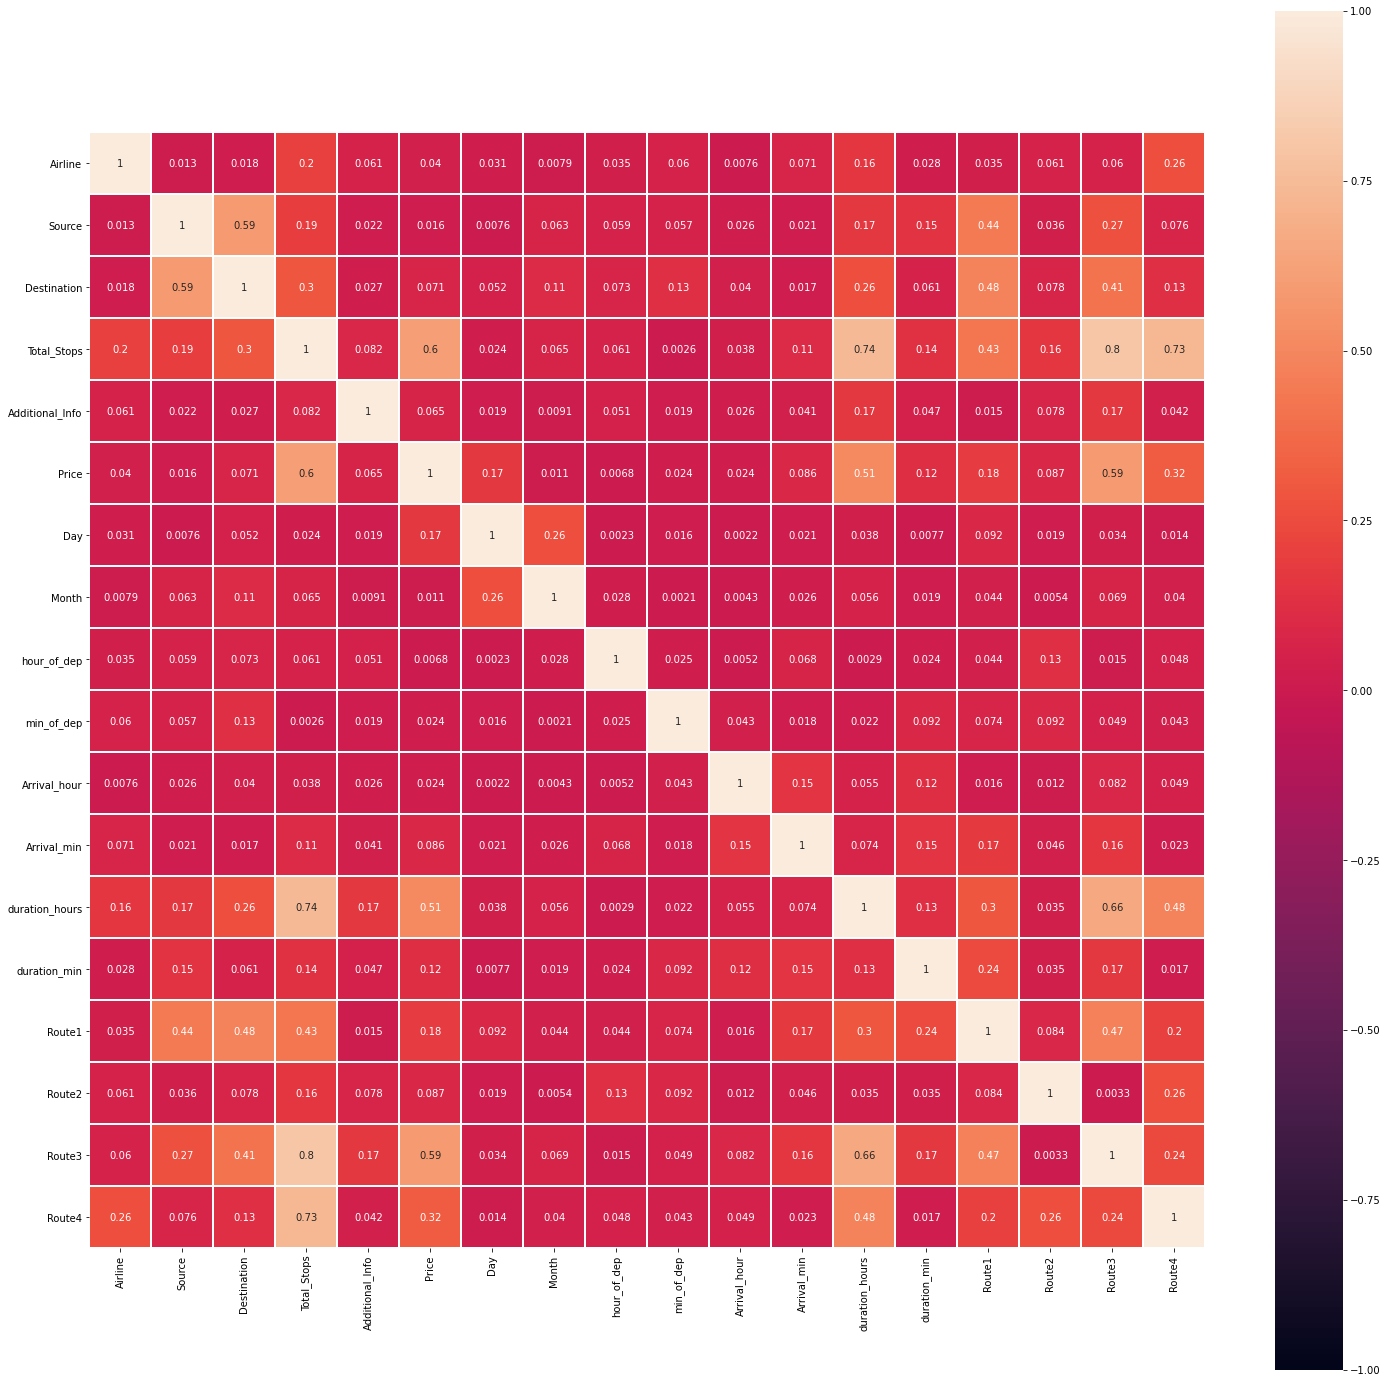

In [48]:
df_corr = df.corr().abs()
plt.figure(figsize=(25,25))
sns.heatmap(df_corr,annot=True,vmin=-1,vmax=1,square=True,linewidth=1,fmt='.2g')
plt.show()

Route3 has higher collinearity with Total_Stops

Route4 and Total_Stops has 73% percent collinearity 

## DataCleanings

In [49]:
df.drop_duplicates(inplace=True)

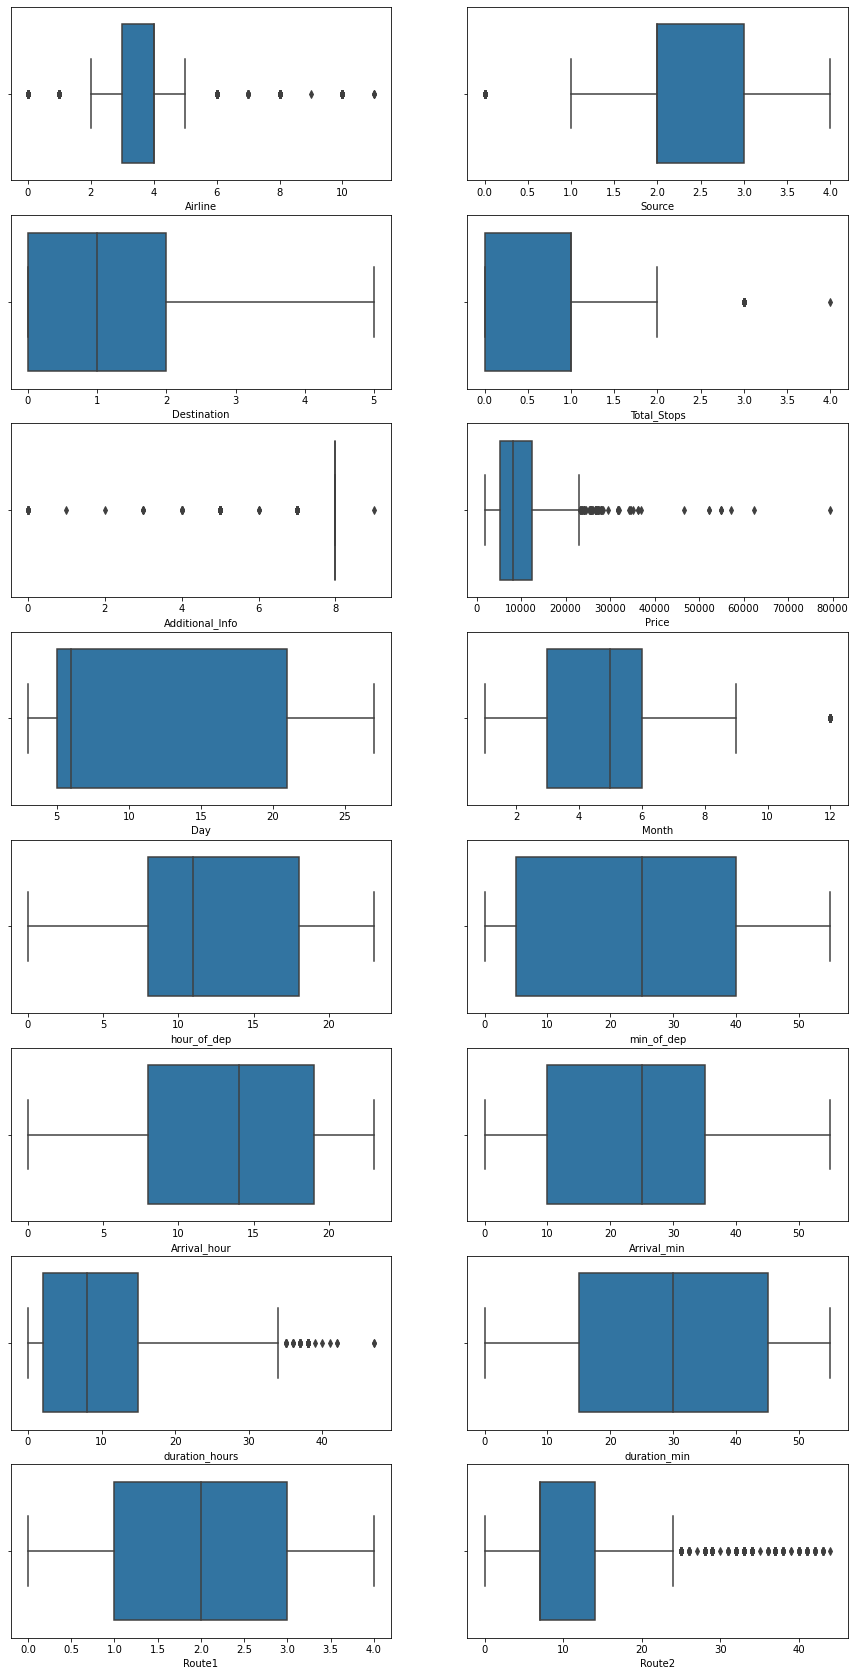

In [50]:
plotnumber=1
plt.figure(figsize=(15,30))
for i in df:
    if plotnumber < 17:
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1
plt.show()

Airline, Source, Total_Stops, Additional_Info, Month, duration_hours, Route2, and Route4 have Outliers but all the columns are either categorical or datetime. So i am not removing their Outliers

Price is our Target Variable so not removing that column Outliers too.

In [51]:
df.skew()

Airline            0.723590
Source            -0.420046
Destination        1.225716
Total_Stops        0.332064
Additional_Info   -1.796195
Price              1.857318
Day                0.376085
Month              0.630581
hour_of_dep        0.108428
min_of_dep         0.171131
Arrival_hour      -0.379185
Arrival_min        0.110459
duration_hours     0.892418
duration_min      -0.085641
Route1            -0.594200
Route2             1.491824
Route3             0.597211
Route4            -2.293217
dtype: float64

Not removing skewness from any column because either they are categorical or our target varible

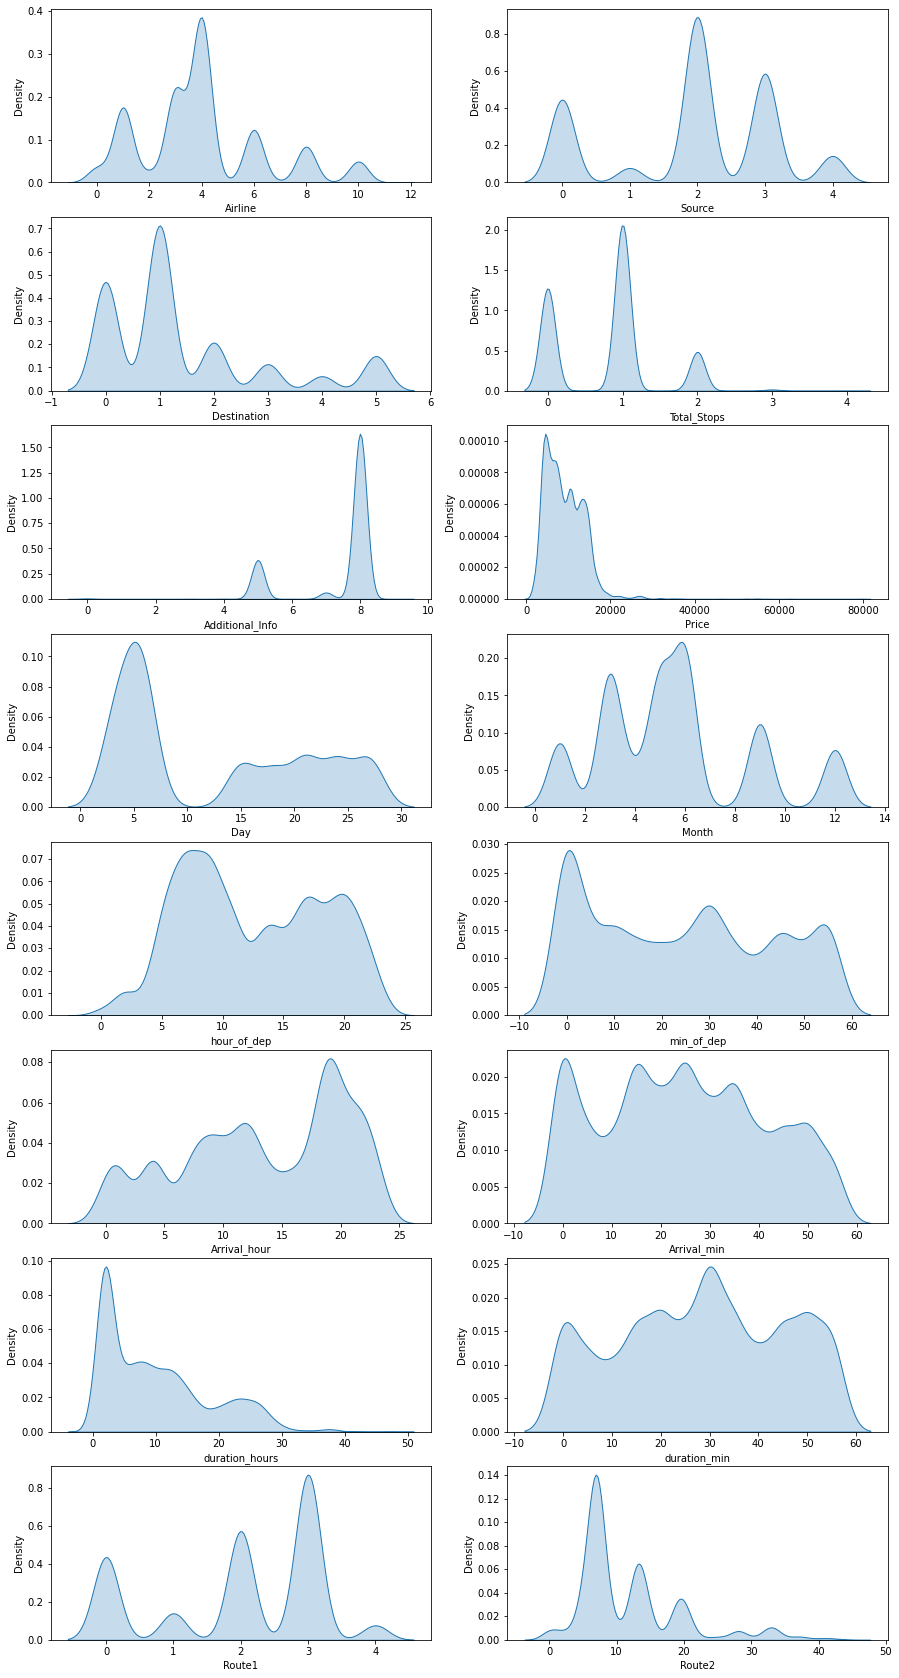

In [52]:
plotnumber=1
plt.figure(figsize=(15,30))
for i in df:
    if plotnumber < 17:
        ax = plt.subplot(8,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True)
    plotnumber+=1
plt.show()

## Testing data cleanings

In [834]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [839]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [840]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


All the columns has object datatypes data

In [836]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Univariate Analysis

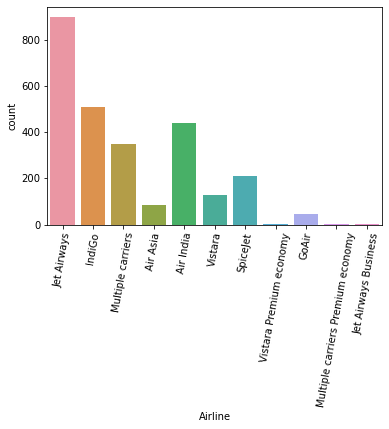

In [845]:
sns.countplot(df_test["Airline"],data=df_test)
plt.xticks(rotation=80)
plt.show()

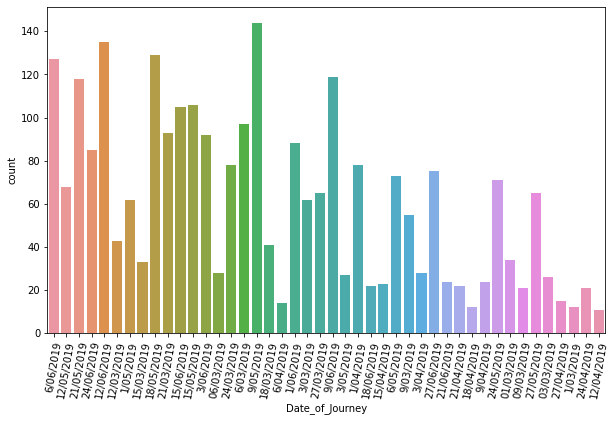

In [846]:
plt.figure(figsize=(10,6))
sns.countplot(df_test["Date_of_Journey"],data=df_test)
plt.xticks(rotation=80)
plt.show()

Most of the people is travelling in the beginning of the month

<AxesSubplot:xlabel='Source', ylabel='count'>

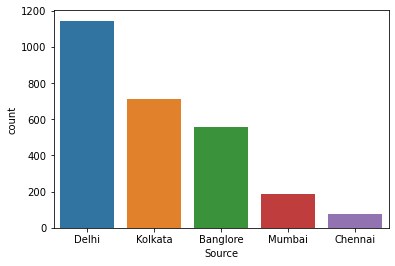

In [847]:
sns.countplot(df_test["Source"],data=df_test)

Most of the people taking flight from dehli

<AxesSubplot:xlabel='Destination', ylabel='count'>

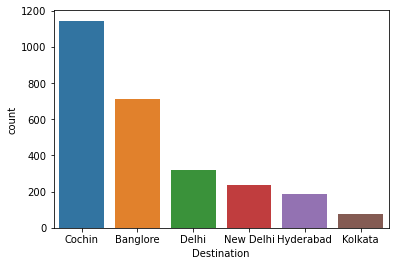

In [848]:
sns.countplot(df_test["Destination"],data=df_test)

Most of the people travelling  to coachin

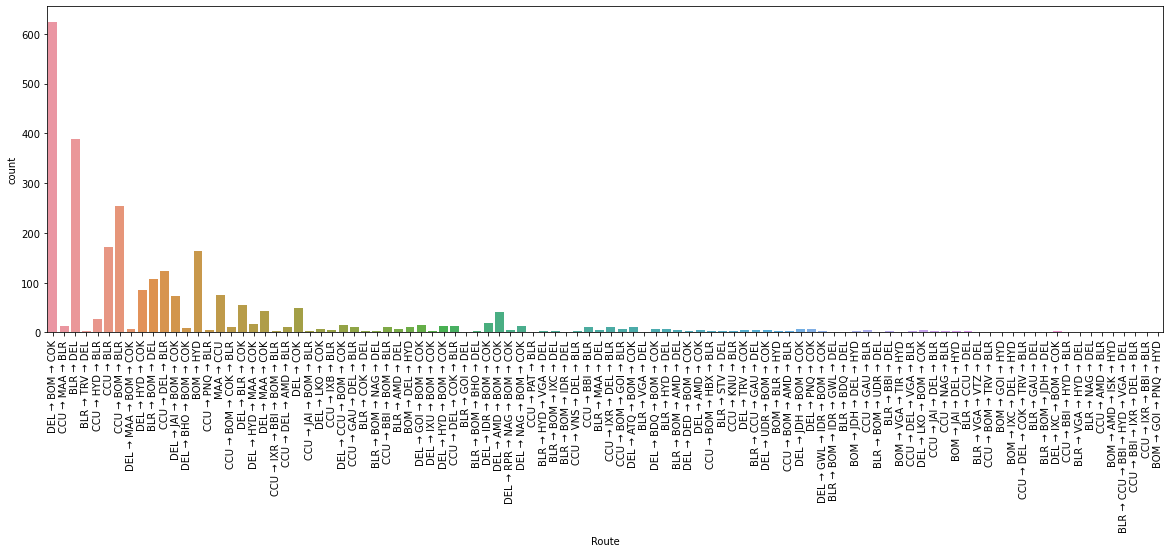

In [854]:
plt.figure(figsize=(20,6))
sns.countplot(df_test["Route"],data=df_test)
plt.xticks(rotation=90)
plt.show()

Maximum flight is taking DEL -> BOM -> COK ROUTE

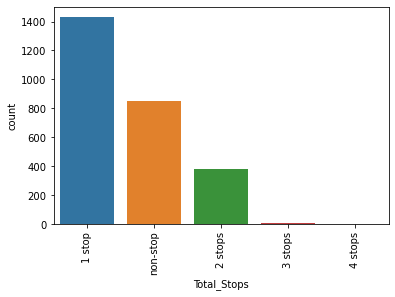

In [864]:
sns.countplot(df_test["Total_Stops"],data=df_test)
plt.xticks(rotation=90)
plt.show()

Maximum flight is taking only one stop

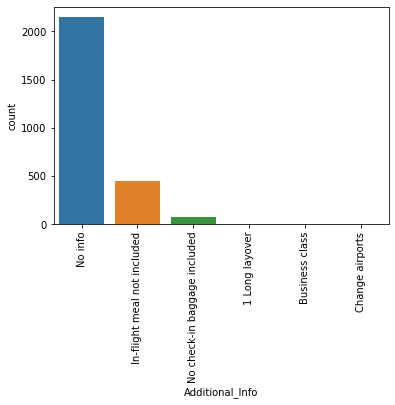

In [866]:
sns.countplot(df_test["Additional_Info"],data=df_test)
plt.xticks(rotation=90)
plt.show()

### Test data Cleanings

In [915]:
df_test = pd.read_excel("C:\\Users\\ASUS\\Desktop\\datasets\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx")

In [916]:
df_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [917]:
## The data is belong to 2019 only so there is no point of separating year from Date_Of_Journey
df_test["Date_of_Journey"] = pd.to_datetime(df_test["Date_of_Journey"])
df_test["Day_of_Journey"] = df_test["Date_of_Journey"].dt.day
df_test["Month_of_Journey"] = df_test["Date_of_Journey"].dt.month

In [918]:
df_test["Dep_Time"] = pd.to_datetime(df_test["Dep_Time"])

In [919]:
df_test["Dep_hour"] = df_test["Dep_Time"].dt.hour

In [920]:
df_test["Dep_min"] = df_test["Dep_Time"].dt.minute

In [921]:
df_test["Arrival_Time"] = pd.to_datetime(df_test["Arrival_Time"])
df_test["Arrival_hour"] = df_test["Arrival_Time"].dt.hour

df_test["Arrival_min"] = df_test["Arrival_Time"].dt.minute

In [931]:
# separating the hours and minute from Duration and making two new features
duration1 = list(df_test["Duration"])

for i in range(0,len(duration1)):
    if len(duration1[i].split()) !=2:
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() +" 0m"
        else:
            duration1[i] = "0h " +duration1[i]

duration_hours1 = []
duration_min1 = []

for i in range(len(duration1)):
    duration_hours1.append(int(duration1[i].split(sep = "h")[0]))
    duration_min1.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

    
    
df_test["duration_hours"] = duration_hours1
df_test["duration_min"] = duration_min1

In [933]:
# Splitting the route and making separate features and where info is missing Nan is filled by itself
df_test["Route1"] = df_test["Route"].str.split("→").str[0]
df_test["Route2"] = df_test["Route"].str.split("→").str[1]
df_test["Route3"] = df_test["Route"].str.split("→").str[2]
df_test["Route4"] = df_test["Route"].str.split("→").str[3]

In [934]:
# Label Encoding the data
df_test["Total_Stops"] = df_test["Total_Stops"].replace("non-stop",0)
df_test["Total_Stops"] = df_test["Total_Stops"].replace("2 stops",2)
df_test["Total_Stops"] = df_test["Total_Stops"].replace("1 stop",1)
df_test["Total_Stops"] = df_test["Total_Stops"].replace("3 stops",3)
df_test["Total_Stops"] = df_test["Total_Stops"].replace("4 stops",4)
df_test["Total_Stops"] = df_test["Total_Stops"].replace("2 stops",2)

In [944]:
df_test.drop(["Route","Dep_Time","Arrival_Time","Duration","Date_of_Journey"],axis=1,inplace=True)

In [939]:
from sklearn.preprocessing import OrdinalEncoder

In [947]:
obj = df_test.select_dtypes(exclude=np.number).columns

In [951]:
# Need to take care Nan because we need it in our dataset because where flight is direct or having 1 stop having Nan in remaining Route column
df_test["Route3"] = df_test["Route3"].astype("str")
df_test['Route4'] = df_test["Route4"].astype("str")

In [952]:
ord_enc = OrdinalEncoder()
for i in df[obj]:
    df_test[[i]] = ord_enc.fit_transform((df_test[[i]]))

### Now test data is ready to pass in  the Final Model

### Model Building

In [53]:
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,chi2

In [54]:
x = df.drop("Price",axis=1)
y= df["Price"]

In [55]:
spercentile = SelectPercentile(score_func = chi2,percentile=90)
spercentile = spercentile.fit(x,y)

In [56]:
cols = spercentile.get_support(indices=True)
feature = x.columns[cols]

In [57]:
df_score = pd.DataFrame({"feature":x.columns,"Chi2score":spercentile.scores_,"pvalue":spercentile.pvalues_})

In [58]:
df_score.sort_values(by='Chi2score',ascending=False)

,feature,Chi2score,pvalue
15,Route3,98785.638069,0.000000
8,min_of_dep,66877.355882,0.000000
11,duration_hours,56944.407195,0.000000
10,Arrival_min,49836.707592,0.000000
14,Route2,48284.573299,0.000000
12,duration_min,43231.833529,0.000000
5,Day,26484.606214,0.000000
9,Arrival_hour,18496.565980,0.000000
2,Destination,15301.726643,0.000000
0,Airline,13849.297324,0.000000


From Above we can see that there is no correlation of Additional_Info

In [212]:
x = df.drop(["Price","Additional_Info"],axis=1)
y = df["Price"]

In [164]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split,KFold
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB

In [213]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [442]:
# Finding the best accuracy and Random State
max_accu = []
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = GradientBoostingRegressor()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = r2_score(y_test,y_pred)
    max_accu.append(accu_score)
max_value = max(max_accu)
print("Max_accuracy :",max(max_accu),"Best Random State :", max_accu.index(max_value)+1)

Max_accuracy : 0.8302675506404973 Best Random State : 85


In [443]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=85)

In [444]:
kf = KFold(n_splits=5,random_state=85)

In [445]:
diff = []
r2 = []
cross = []

### GradientBoosting

In [446]:
gbc = GradientBoostingRegressor()
gbc.fit(x_train,y_train)

GradientBoostingRegressor()

In [447]:
y_pred = gbc.predict(x_test)

In [448]:
r = r2_score(y_test,y_pred)
c = cross_val_score(gbc,x_scaled,y,cv=kf).mean()

In [449]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [450]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c)

 R2 Score is : 0.8302843469996684 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.7887489614521629


### BaggingRegressor

In [451]:
bag_reg = BaggingRegressor()
bag_reg.fit(x_train,y_train)

BaggingRegressor()

In [452]:
y_pred = bag_reg.predict(x_test)

In [453]:
r = r2_score(y_test,y_pred)
c = cross_val_score(bag_reg,x_scaled,y,cv=kf).mean()

In [454]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [455]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c)

 R2 Score is : 0.7958941514027624 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.7864009555308057


### RandomForestRegressor

In [456]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [457]:
y_pred = rf.predict(x_test)

In [458]:
r = r2_score(y_test,y_pred)
c = cross_val_score(rf,x_scaled,y,cv=kf).mean()

In [459]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [460]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c)

 R2 Score is : 0.8014408030744662 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.793789985036247


### XGB

In [461]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [462]:
y_pred = xgb.predict(x_test)

In [463]:
r = r2_score(y_test,y_pred)
c = cross_val_score(xgb,x_scaled,y,cv=kf).mean()

In [464]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [465]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c)

 R2 Score is : 0.8604127756993863 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.8300674423858082


### GaussianNB

In [466]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [467]:
y_pred = gnb.predict(x_test)

In [468]:
r = r2_score(y_test,y_pred)
c = cross_val_score(gnb,x_scaled,y,cv=kf).mean()

In [469]:
r2.append(r)
cross.append(c)
diff.append(r-c)

In [470]:
print(" R2 Score is :",r,"\n","=-"*60,"\n Cross validation score :",c)

 R2 Score is : 0.5676303823738187 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.2509560229445507


In [692]:
models = ["GradientBoosting","BaggingRegressor","RandomForest","XGB","GaussianNB"]

In [693]:
regressor = pd.DataFrame({"Models":models,
                         "R2 Score":r2,
                         "Cross_validation_score":cross,
                         "Difference":diff})

In [694]:
regressor

,Models,R2 Score,Cross_validation_score,Difference
0,GradientBoosting,0.830284,0.788749,0.041535
1,BaggingRegressor,0.795894,0.786401,0.009493
2,RandomForest,0.801441,0.793790,0.007651
3,XGB,0.860413,0.830067,0.030345
4,GaussianNB,0.567630,0.250956,0.316674


### Hyperparameter Tunning

In [687]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [799]:
params = {"n_estimators":[100,300,500],"min_samples_split":[2,3,1,4,5],"bootstrap":[True,False],
          "max_depth":[4,13,11,14],"min_samples_leaf":[2,3],"oob_score":[True,False]
         }

In [800]:
rand_search = RandomizedSearchCV(rf,param_distributions=params,cv=3)

In [801]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=13,
                                                   min_samples_leaf=2,
                                                   n_estimators=500,
                                                   oob_score=True),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 13, 11, 14],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3, 1, 4, 5],
                                        'n_estimators': [100, 300, 500],
                                        'oob_score': [True, False]})

In [802]:
rand_search.best_params_

{'oob_score': False,
 'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 14,
 'bootstrap': True}

In [828]:
rf = RandomForestRegressor(n_estimators=300,min_samples_split=2,min_samples_leaf=2,max_depth=14,bootstrap=True,oob_score=True)

In [829]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=14, min_samples_leaf=2, n_estimators=300,
                      oob_score=True)

In [830]:
y_pred = rf.predict(x_test)

In [831]:
r2_score(y_test,y_pred)

0.8235573489127376

In [832]:
cross_val_score(rf,x_scaled,y,cv=3).mean()

0.8067399511234307

### Saiving the Model and passing the testing dataset

In [955]:
import pickle

In [956]:
pickle.dump(rf,open("flight_price.pk1","wb"))

In [957]:
load_model = pickle.load(open("flight_price.pk1","rb"))

### Passing the test data in the final model

In [964]:
predicted_price  = load_model.predict(df_test.drop("Additional_Info",axis=1))

In [969]:
pd.set_option("display.max_rows",None)

In [974]:
# saving the price in dataframe
Price_predicted = pd.DataFrame(predicted_price)